In [1]:
import os
import gzip
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = "cnvcka.tsv"
dfile = pd.read_csv(filename, sep='\t')
dfile = dfile.dropna(subset=['#chrom'])

dfile.head()


,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,guidelines,otherIds,_mouseOver,_clinSignCode,_originCode,_allTypeCode,_varLen,_starCount,_variantId,_dbVarSsvId
0,chr1,16301,166909,nssv584580,0,.,16301,166909,"77,184,255",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh37/hg19 1q21.1(chr1:143134063-143284670)x3...,BN,UNK,GAIN,150608,0,145208,nssv584580
1,chr1,91323,128277,nssv1609094,0,.,91323,128277,"255,98,119",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,"GRCh37/hg19 1p36.11(chr1:26930197-26968251)x1,...",LB,UNK,LOSS,36954,0,151336,nssv1609094
2,chr1,629024,8537745,nssv577125,1,.,629024,8537745,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.23(chr1:629025-8537745)...,PG,UNK,LOSS,7908721,1,58242,nssv577125
3,chr1,629043,7008678,nssv577128,1,.,629043,7008678,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.31(chr1:629044-7008678)...,PG,UNK,LOSS,6379635,1,58244,nssv577128
4,chr1,629043,3346226,nssv577127,1,.,629043,3346226,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.32(chr1:629044-3346226)...,PG,UNK,LOSS,2717183,1,58243,nssv577127


In [2]:
directory = 'data/data/annotated_cnvs_json'
dfs = []

for filename in os.listdir(directory)[:15]:
    if filename.endswith('.json.gz'):
        file_path = os.path.join(directory, filename)

        with gzip.open(file_path, 'rb') as f:
            file_content = f.read().decode('utf-8')

        data = json.loads(file_content)
        genes_df = pd.json_normalize(data, 'genes', sep='_')
        main_df = pd.json_normalize(data, sep='_')
        result_df = pd.concat([main_df, genes_df], axis=1)
        dfs.append(result_df)

df = pd.concat(dfs, ignore_index=True)
df = df.dropna(subset=['chrom'])

df.head(15)

,chrom,start,end,cnv_type,genes,Pathway(ConsensusPathDB)_imputed_unscaled,Pathway(ConsensusPathDB)_imputed_scaled,Pathway(ConsensusPathDB)_unimputed_unscaled,Pathway(ConsensusPathDB)_raw,Function_description_imputed_unscaled,...,Essential_gene_gene-trap_N_unimputed_unscaled,Essential_gene_gene-trap_N_raw,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_E_raw,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,Gene_indispensability_pred_N_raw
0,10,100194214.0,132432797.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,PI3K-Akt signaling pathway - Homo sapiens (hum...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
197,10,100600491.0,133622588.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Primary Focal Segmental Glomerulosclerosis FSG...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
406,10,100677716.0,100764519.0,loss,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Primary Focal Segmental Glomerulosclerosis FSG...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
407,10,101120346.0,101831908.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Transcriptional misregulation in cancer - Homo...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
417,10,101177304.0,101719109.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,0,0,0,NaN,1,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
422,10,101209581.0,101748381.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,0,0,0,NaN,1,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
427,10,101253668.0,101395093.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Circadian rhythm - Homo sapiens (human);Oocyte...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
428,10,101261618.0,101468818.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Circadian rhythm - Homo sapiens (human);Oocyte...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
429,10,101297762.0,101618190.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Circadian rhythm - Homo sapiens (human);Oocyte...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
433,10,101370486.0,101583324.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,Circadian rhythm - Homo sapiens (human);Oocyte...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E


In [3]:
selected_attributes_df = df[['HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]
selected_attributes_df.head(15)

,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
0,0.773706,0.001296
197,0.791830,0.878654
406,0.791830,0.878654
407,0.735813,0.510805
417,0.734905,0.189118
422,0.734905,0.189118
427,0.764717,0.136832
428,0.764717,0.136832
429,0.764717,0.136832
433,0.764717,0.136832


In [4]:
df.columns

Index(['chrom', 'start', 'end', 'cnv_type', 'genes',
       'Pathway(ConsensusPathDB)_imputed_unscaled',
       'Pathway(ConsensusPathDB)_imputed_scaled',
       'Pathway(ConsensusPathDB)_unimputed_unscaled',
       'Pathway(ConsensusPathDB)_raw', 'Function_description_imputed_unscaled',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=377)

In [5]:
merged_df = pd.merge(dfile, df, left_on=['#chrom', 'chromStart', 'chromEnd'], right_on=['chrom', 'start', 'end'], how='outer')

merged_df

,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,Essential_gene_gene-trap_N_unimputed_unscaled,Essential_gene_gene-trap_N_raw,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_E_raw,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,Gene_indispensability_pred_N_raw
0,chr1,16301.0,166909.0,nssv584580,0.0,.,16301.0,166909.0,"77,184,255",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,91323.0,128277.0,nssv1609094,0.0,.,91323.0,128277.0,"255,98,119",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,629024.0,8537745.0,nssv577125,1.0,.,629024.0,8537745.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,629043.0,7008678.0,nssv577128,1.0,.,629043.0,7008678.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,629043.0,3346226.0,nssv577127,1.0,.,629043.0,3346226.0,"153,0,0",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
21400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E


In [6]:
merged_df.columns

Index(['#chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=418)

In [7]:
final_df = merged_df[[ 'chrom', 'start', 'end', 'HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]
final_df = final_df.dropna()
final_df

,chrom,start,end,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
21387,10,100194214.0,132432797.0,0.773706,0.001296
21388,10,100600491.0,133622588.0,0.791830,0.878654
21389,10,100677716.0,100764519.0,0.791830,0.878654
21390,10,101120346.0,101831908.0,0.735813,0.510805
21391,10,101177304.0,101719109.0,0.734905,0.189118
21392,10,101209581.0,101748381.0,0.734905,0.189118
21393,10,101253668.0,101395093.0,0.764717,0.136832
21394,10,101261618.0,101468818.0,0.764717,0.136832
21395,10,101297762.0,101618190.0,0.764717,0.136832
21396,10,101370486.0,101583324.0,0.764717,0.136832


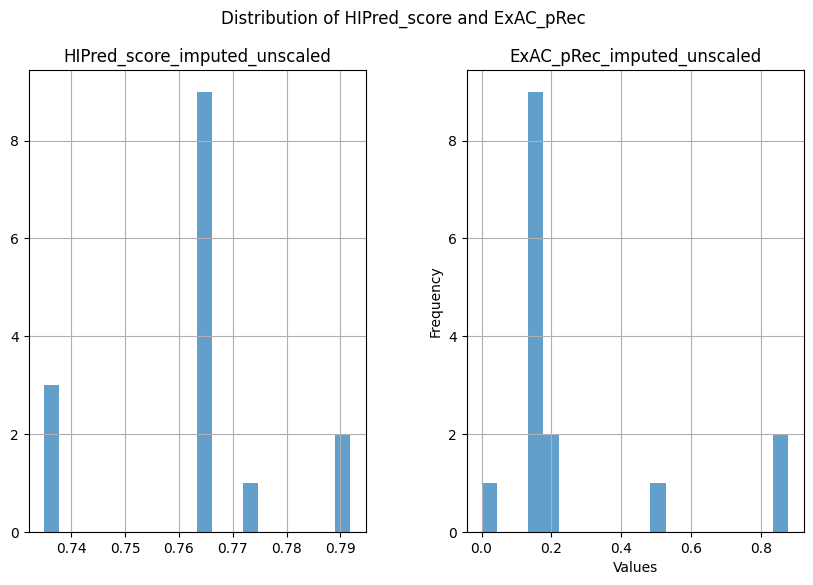

In [8]:
selected_df = final_df[['HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]

selected_df.hist(figsize=(10, 6), bins=20, alpha=0.7)
plt.suptitle('Distribution of HIPred_score and ExAC_pRec')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [9]:
selected_df['ExAC_pRec_imputed_unscaled'].value_counts()

0.136832    9
0.878654    2
0.189118    2
0.001296    1
0.510805    1
Name: ExAC_pRec_imputed_unscaled, dtype: int64

In [10]:
selected_df.corr()

,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
HIPred_score_imputed_unscaled,1.000000,0.429805
ExAC_pRec_imputed_unscaled,0.429805,1.000000


In [11]:
final_df.corr()

C:\Users\janos\AppData\Local\Temp\ipykernel_18760\2626907977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.corr()


,start,end,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
start,1.000000,-0.801577,-0.405938,-0.456471
end,-0.801577,1.000000,0.456334,0.270544
HIPred_score_imputed_unscaled,-0.405938,0.456334,1.000000,0.429805
ExAC_pRec_imputed_unscaled,-0.456471,0.270544,0.429805,1.000000


In [12]:
df.columns

Index(['chrom', 'start', 'end', 'cnv_type', 'genes',
       'Pathway(ConsensusPathDB)_imputed_unscaled',
       'Pathway(ConsensusPathDB)_imputed_scaled',
       'Pathway(ConsensusPathDB)_unimputed_unscaled',
       'Pathway(ConsensusPathDB)_raw', 'Function_description_imputed_unscaled',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=377)

In [13]:
selected_df.describe()

,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
count,15.000000,15.000000
mean,0.763029,0.258609
std,0.017157,0.272796
min,0.734905,0.001296
25%,0.764717,0.136832
50%,0.764717,0.136832
75%,0.764717,0.189118
max,0.791830,0.878654


In [51]:

df_without_start_end = df.drop(['start', 'end'], axis=1)
correlation_matrix = df_without_start_end.corr()
selected_correlations = correlation_matrix[
    (correlation_matrix != 1.0) & (correlation_matrix != -1.0) & (correlation_matrix >= 0.5)
]
print(selected_correlations.shape)
selected_correlations.head(5)


(315, 315)


C:\Users\janos\AppData\Local\Temp\ipykernel_18760\2162933311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_start_end.corr()


,Pathway(ConsensusPathDB)_imputed_unscaled,Pathway(ConsensusPathDB)_imputed_scaled,Pathway(ConsensusPathDB)_unimputed_unscaled,Function_description_imputed_unscaled,Function_description_imputed_scaled,Function_description_unimputed_unscaled,Disease_description_imputed_unscaled,Disease_description_imputed_scaled,Disease_description_unimputed_unscaled,MIM_disease_imputed_unscaled,...,Essential_gene_gene-trap_K_unimputed_unscaled,Essential_gene_gene-trap_N_imputed_unscaled,Essential_gene_gene-trap_N_imputed_scaled,Essential_gene_gene-trap_N_unimputed_unscaled,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled
Pathway(ConsensusPathDB)_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pathway(ConsensusPathDB)_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pathway(ConsensusPathDB)_unimputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Function_description_imputed_unscaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Function_description_imputed_scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='MIM_disease_imputed_unscaled', ylabel='P(HI)_unimputed_unscaled'>

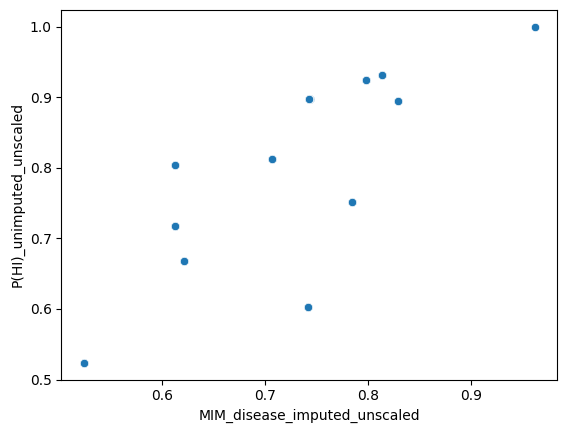

In [15]:
sns.scatterplot(x='MIM_disease_imputed_unscaled', 
                y='P(HI)_unimputed_unscaled', 
                data=selected_correlations)

In [16]:
selected_correlations['MIM_disease_imputed_unscaled'].corr(selected_correlations['P(HI)_unimputed_unscaled'])


0.7526477391590848

<Axes: xlabel='Pathway(ConsensusPathDB)_unimputed_unscaled', ylabel='Gene_indispensability_score_imputed_scaled'>

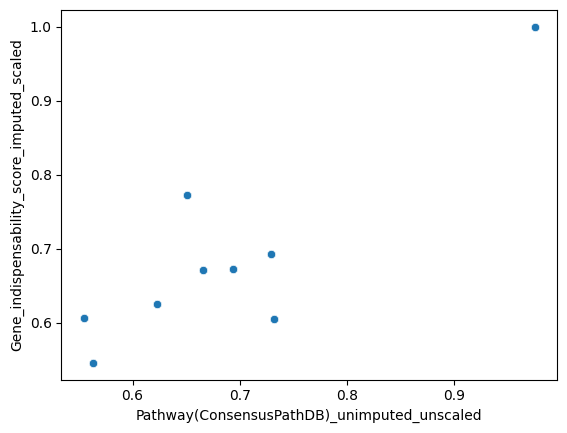

In [17]:
sns.scatterplot(x='Pathway(ConsensusPathDB)_unimputed_unscaled', 
                y='Gene_indispensability_score_imputed_scaled', 
                data=selected_correlations)

In [18]:
selected_correlations['Gene_indispensability_score_imputed_scaled'].corr(selected_correlations['Pathway(ConsensusPathDB)_unimputed_unscaled'])


0.7770195085011394

<Axes: xlabel='Gene_indispensability_pred_E_unimputed_unscaled', ylabel='Gene_indispensability_score_raw'>

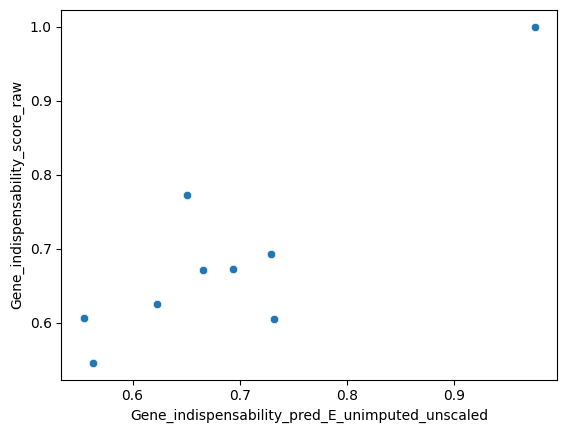

In [19]:
sns.scatterplot(x='Gene_indispensability_pred_E_unimputed_unscaled', 
                y='Gene_indispensability_score_raw', 
                data=selected_correlations)

In [20]:
selected_correlations['Gene_indispensability_pred_E_unimputed_unscaled']['Gene_indispensability_score_raw']


0.9749889199613411

<Axes: xlabel='P(HI)_raw', ylabel='Disease_description_unimputed_unscaled'>

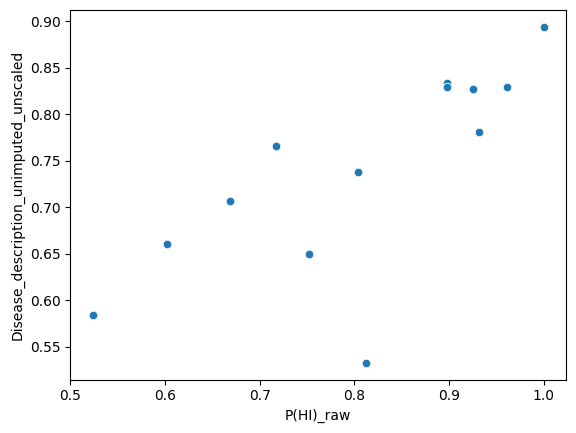

In [21]:
sns.scatterplot(x='P(HI)_raw', 
                y='Disease_description_unimputed_unscaled', 
                data=selected_correlations)

In [22]:
selected_correlations['P(HI)_raw'].corr(selected_correlations['Disease_description_unimputed_unscaled'])


0.7386779261510042

<Axes: xlabel='P(HI)_raw', ylabel='Disease_description_imputed_unscaled'>

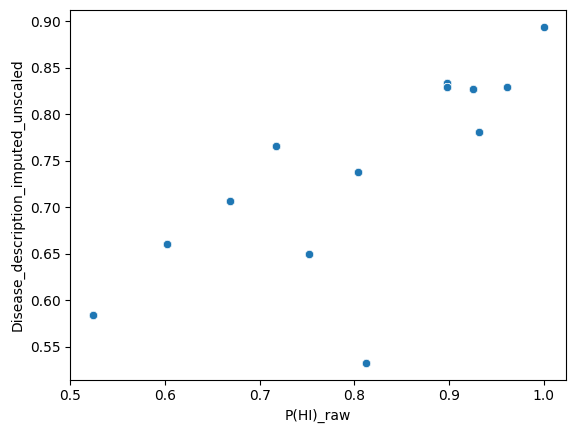

In [23]:
sns.scatterplot(x='P(HI)_raw', 
                y='Disease_description_imputed_unscaled', 
                data=selected_correlations)

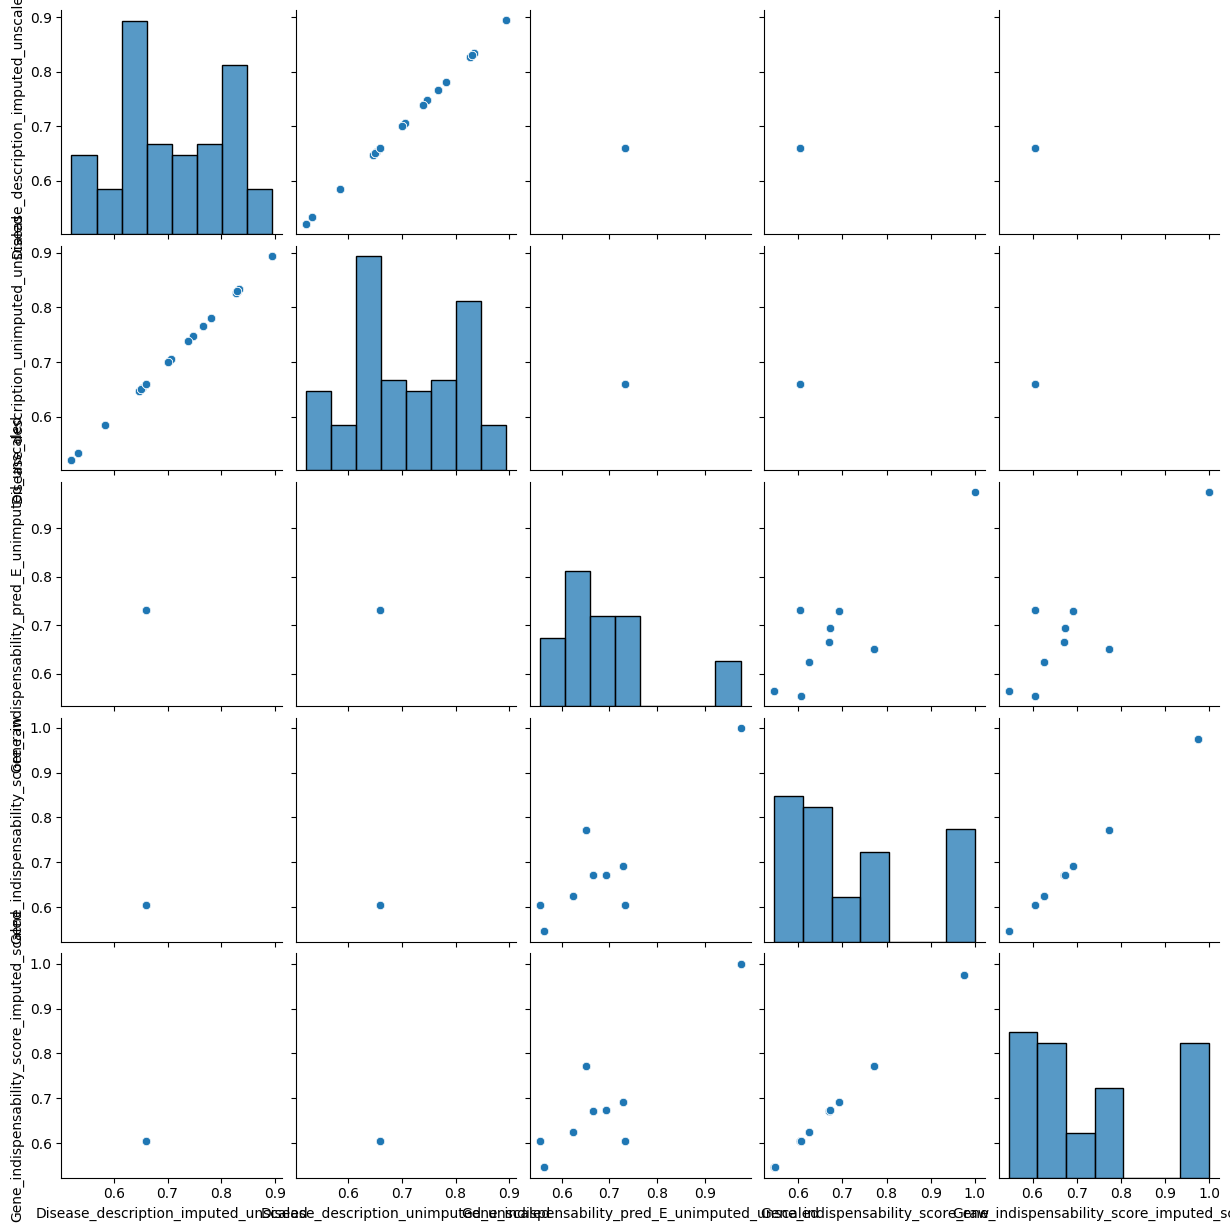

In [44]:
subset = selected_correlations[['Disease_description_imputed_unscaled',
       'Disease_description_unimputed_unscaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_score_raw',
       'Gene_indispensability_score_imputed_scaled']]
sns.pairplot(subset)